# 기본 패키지 설정

In [31]:
## 1.기본
import numpy as np 
import matplotlib.pyplot as plt

## 2.데이터 가져오기
import pandas as pd # csv -> 데이터프레임으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

## 3.훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 4.분류모델구축
from sklearn.tree import DecisionTreeClassifier # 결정 트리(분류)
from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델

## 4_1.앙상블 모델 구축
from sklearn.ensemble import VotingClassifier # 과반수 투표(Majority Voting)
from sklearn.ensemble import RandomForestClassifier # 배깅-랜덤 포레스트
from sklearn.ensemble import AdaBoostClassifier

## 5.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
                            # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 6.최적화
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝
from sklearn.model_selection import cross_val_score # 교차타당도 # 추가

# 데이터 가져오기

In [32]:
#원본 데이터를 데이터 프레임 형태로 가져오기
df = pd.read_csv('cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [33]:
#데이터 파악
#dignosis는 문자 형태(object)로 구성되어있다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
#결측값 확인
#'Unnamed:32' columns는 원본 데이터를 확인해 봤을 때 불필요하므로 drop시킬 예정
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# 데이터 전처리

In [35]:
#문자 형태인 타깃 값을 숫자 형태로 변환해주는것
#필요 없는 columns을 drop 시키는 작업이 필요함

In [36]:
# unique()를 사용해 값의 특성을 확인
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [37]:
#타겟값(y = diagnosis) 숫자 형태로 변환
def func1(row):
    if 'M' in row:
        return 1
    else:
        return 0

#'판정'이라는 새로운 columns 를 만들어 넣어줌
df['판정'] = df['diagnosis'].apply(func1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,판정
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [38]:
# 필요 없는 columns drop 시키기
total = df.drop(columns=['id','diagnosis','Unnamed: 32'])
total.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,판정
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# train/test data set 분할

In [39]:
input_data = total.drop(['판정'],axis=1) # 판정을 제외한 나머지
target =  total['판정']                  # 판정값 만을 갖고있는 데이터

train_input, test_input, train_target, test_target = train_test_split(input_data,
                                                                     target,
                                                                     test_size=0.3,
                                                                     random_state=18,
                                                                     stratify=target)

# 모델 구축

##  투표(voting) 기법

In [83]:
logistic = LogisticRegression(solver='liblinear',
                              penalty='l2',
                              C=0.001,
                              random_state=1)

tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1)

knn = KNeighborsClassifier(n_neighbors=1,
                           p=2,
                           metric='minkowski')

voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

voting = VotingClassifier(estimators= voting_estimators,
                         voting='soft') # hard : 다수의 모델이 예측한 동일한 값
                                        # soft : 다수의 모델중 가장 높은 예측 값
clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority voting']

all_clf = [logistic, tree, knn, voting]

##  배깅-랜덤포레스트

In [103]:
tree = DecisionTreeClassifier(criterion='entropy',
                             random_state=1)

forest = RandomForestClassifier(criterion='gini',
                               n_estimators=500,# 의사 결정 나무의 수
                               random_state=1)

clf_labels = ['Decision tree', 'Random forest']

all_clf = [tree, forest]

##  부스팅(AdaBoost)

In [80]:
tree = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=1)

adaboost = AdaBoostClassifier(base_estimator=tree,
                              n_estimators=500,
                              learning_rate=0.1,
                              random_state=1)

clf_labels = ['Decision tree', 'Ada boost']

all_clf = [tree, adaboost]

# 모델검정

##  투표 기법

In [71]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                            X = train_input,
                            y = train_target,
                            cv = 10,
                            scoring='roc_auc')
    print('ROC AUC: %0.3f (+/- %0.3f) [%s]'
          % (scores.mean(), scores.std(), label))

# 로지스틱 회귀분석은 97%, 의사결정 나무는 93%, KNN은 90%, 투표기법은 98% 

ROC AUC: 0.972 (+/- 0.022) [Logistic regression]
ROC AUC: 0.932 (+/- 0.031) [Decision tree]
ROC AUC: 0.904 (+/- 0.055) [KNN]
ROC AUC: 0.985 (+/- 0.012) [Majority voting]


##  랜덤 포레스트 기법

In [104]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                            X = train_input,
                            y = train_target,
                            cv = 10,
                            scoring='roc_auc')
    print('ROC AUC: %0.3f (+/- %0.3f) [%s]'
          % (scores.mean(), scores.std(), label))

# 의사결정 나무는 93%, 포레스트를 사용하면 98%인걸 알수있다

ROC AUC: 0.932 (+/- 0.031) [Decision tree]
ROC AUC: 0.986 (+/- 0.021) [Random forest]


##  부스팅

In [52]:
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                            X = train_input,
                            y = train_target,
                            cv = 10,
                            scoring='roc_auc')
    print('ROC AUC: %0.3f (+/- %0.3f) [%s]'
          % (scores.mean(), scores.std(), label))

#의사결정나무를 사용했을 땐 88%인 반명 AdaBoost를 적용했을때는 AUC값이 99%

ROC AUC: 0.880 (+/- 0.047) [Decision tree]
ROC AUC: 0.992 (+/- 0.010) [Ada boost]


## 투표 기법 (로지스틱 회귀 분석, 의사결정나무,KNN,보팅) 

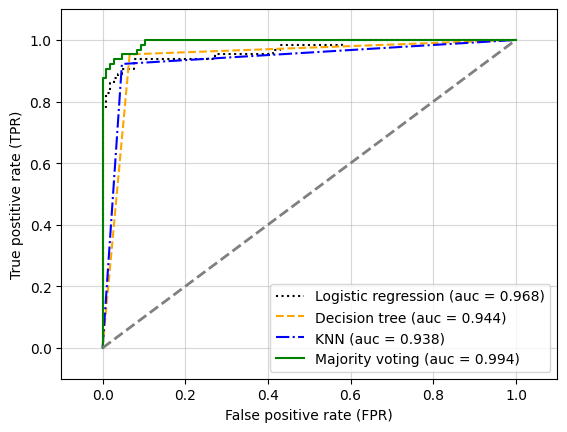

In [64]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
            in zip(all_clf, clf_labels, colors, linestyles):
    
    clf.fit(train_input, train_target)
    y_pred = clf.predict_proba(test_input)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=test_target,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr,tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True postitive rate (TPR)')

plt.show()

## 랜덤 포레스트

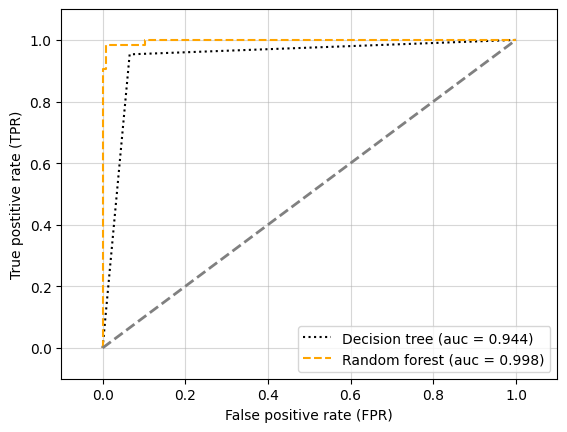

In [74]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
            in zip(all_clf, clf_labels, colors, linestyles):
    
    clf.fit(train_input, train_target)
    y_pred = clf.predict_proba(test_input)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=test_target,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr,tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True postitive rate (TPR)')

plt.show()

##  부스팅(AdaBoost)

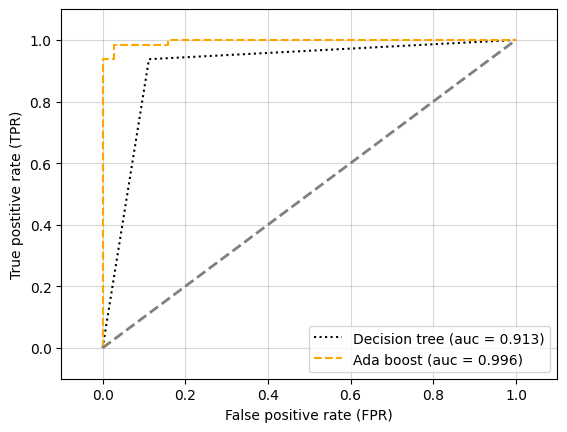

In [76]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
            in zip(all_clf, clf_labels, colors, linestyles):
    
    clf.fit(train_input, train_target)
    y_pred = clf.predict_proba(test_input)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=test_target,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr,tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True postitive rate (TPR)')

plt.show()

## 정오 분류표로 검정

##  랜덤 포레스트

In [111]:
forest.fit(train_input, train_target)

y_pred = forest.predict(test_input)

print('잘못 분류된 샘플 개수: %d' % (test_target != y_pred).sum())
print('정확도: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도: %.3f' % precision_score(y_true=test_target, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))

잘못 분류된 샘플 개수: 3
정확도: 0.982
정밀도: 0.969
재현율: 0.984
F1: 0.977


## 부스팅

In [82]:
adaboost.fit(train_input, train_target)

y_pred = adaboost.predict(test_input)

print('잘못 분류된 샘플 개수: %d' % (test_target != y_pred).sum())
print('정확도: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도: %.3f' % precision_score(y_true=test_target, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=test_target, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=test_target, y_pred=y_pred))

잘못 분류된 샘플 개수: 7
정확도: 0.959
정밀도: 0.952
재현율: 0.938
F1: 0.945


#  최적화

## 투표 기법-하이퍼 파라미터 튜닝

In [85]:
# 사용가능한 파라미터 확인
voting.get_params()

{'estimators': [('logistic',
   LogisticRegression(C=0.001, random_state=1, solver='liblinear')),
  ('tree', DecisionTreeClassifier(criterion='entropy', random_state=1)),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'logistic': LogisticRegression(C=0.001, random_state=1, solver='liblinear'),
 'tree': DecisionTreeClassifier(criterion='entropy', random_state=1),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'logistic__C': 0.001,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': 1,
 'logistic__solver': 'liblinear',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False,
 'tree__ccp_alpha': 0.0,
 'tree__class_wei

In [97]:
# 그리드 서치
params = {'logistic__C': [0.001, 0.1, 100.0],
          'tree__max_depth': [1,2,3,4,5],
          'knn__n_neighbors': [1,2,3,4,5]}

grid = GridSearchCV(estimator=voting,
                    param_grid=params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(train_input, train_target)
    
print('최적의 파라미터: %s' % grid.best_params_)
print('ACU: %.3f' % grid.best_score_)
# grid.best_score_ 를 사용하여 최적의 파라미터 값을 구하고, 그것을 적용했을 때
# 나온  AUC의 값이 투표기법을 사용하여 분석했을 때 모델의 모델의 정확도이다

최적의 파라미터: {'knn__n_neighbors': 5, 'logistic__C': 0.1, 'tree__max_depth': 4}
ACU: 0.989


##  랜덤 포레스트 - 특성 중요도 확인

In [99]:
# 모델 구축 단계에서 랜덤 포레스트 샘플을 500개를 만들었고 나무의 가지가 1개
#일 때부터 여러 개일 때까지 무수히 많은 옵션을 만든다는 것이고, 이렇게 만들어진
#샘플 중 최적의 브런치들만 모아서 하나의 최적의 모델을 만드는 것이 
#랜덤 포레스트의 원리

 1 perimeter_worst                0.134071
 2 radius_worst                   0.120510
 3 area_worst                     0.115410
 4 concave points_worst           0.096413
 5 concave points_mean            0.074430
 6 perimeter_mean                 0.052423
 7 radius_mean                    0.050795
 8 concavity_mean                 0.050191
 9 area_mean                      0.047729
10 area_se                        0.042351
11 concavity_worst                0.038904
12 texture_worst                  0.021425
13 texture_mean                   0.017920
14 radius_se                      0.016897
15 compactness_worst              0.014938
16 perimeter_se                   0.014815
17 smoothness_worst               0.014195
18 symmetry_worst                 0.012509
19 compactness_mean               0.007926
20 fractal_dimension_worst        0.007360
21 smoothness_mean                0.006433
22 concavity_se                   0.005815
23 fractal_dimension_se           0.005668
24 texture_

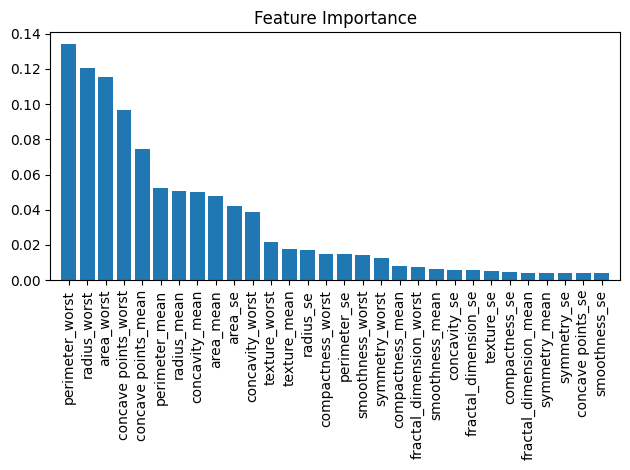

In [113]:
# 특성들(X) 별로 타겟값(y)에 미치는 중요도(영향도)를 확인
feet_labels = train_input.columns

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_input.shape[1]):
    print('%2d %-*s %f' % (f +1, 30,
                           feet_labels[indices[f]],
                           importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_input.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(train_input.shape[1]),
           feet_labels[indices], rotation=90)
plt.xlim([-1, train_input.shape[1]])
plt.tight_layout()
plt.show()